In [532]:
import cv2
import os
import numpy as np
import pandas as pd
import dlib

from classes import WBsRGB as wb_srgb
from matplotlib import pyplot as plt
from colorthief import ColorThief

In [533]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
  (h, w) = image.shape[:2]

  if width is None and height is None:
    return image
  if width is None:
    r = height / float(h)
    dim = (int(w * r), height)
  else:
    r = width / float(w)
    dim = (width, int(h * r))

  return cv2.resize(image, dim, interpolation=inter)

In [534]:
# get the dominant color
def dominant_color(path, show=0):
    color_thief = ColorThief(path)
    dominant_color = color_thief.get_color(quality=1)
    
    if show == 1:
        dominant_colors = np.zeros((300,300,3), np.uint8)
        dominant_palette[:] = dominant_color
        plt.imshow(dominant_palette)
        plt.title('Dominant Color')
        plt.show()
        
    return dominant_color

In [537]:
def white_balancing(inImg, imshow=1, imwrite=1, imcrop=0):
    print(inImg)
    out_dir = '.'  # output directory
    # use upgraded_model= 1 to load our new model that is upgraded with new
    # training examples.
    upgraded_model = 0
    # use gamut_mapping = 1 for scaling, 2 for clipping (our paper's results
    # reported using clipping). If the image is over-saturated, scaling is
    # recommended.
    gamut_mapping = 2
    # processing
    # create an instance of the WB model
    wbModel = wb_srgb.WBsRGB(gamut_mapping=gamut_mapping,
                             upgraded=upgraded_model)
    os.makedirs(out_dir, exist_ok=True)
    # I = cv2.imread(in_img)  # read the image
    outImg = wbModel.correctImage(inImg) # white balance i
    outImg =(outImg*255).astype(np.uint8) 
    
    if imcrop == 1:
        detector = dlib.get_frontal_face_detector()
        faces = detector(outImg)
        x1 = faces[0].left() # left point
        y1 = faces[0].top() # top point
        x2 = faces[0].right() # right point
        y2 = faces[0].bottom() # bottom point
        outImg = outImg[y1:y2, x1:x2]
        inImg = inImg[y1:y2, x1:x2]
        
    if imshow == 1:
        origin_img = ResizeWithAspectRatio(inImg, width=600)
        b,g,r = cv2.split(origin_img)
        origin_img = cv2.merge((r,g,b))
        plt.imshow(origin_img)
        plt.title('Original Image')
        plt.show()
        output_img = ResizeWithAspectRatio(outImg, width=600)
        b,g,r = cv2.split(output_img)
        output_img = cv2.merge((r,g,b))
        plt.imshow(output_img)
        plt.title('Processed Image')
        plt.show()
    
    path = ''
    if imwrite == 1:
        cv2.imwrite(out_dir + '/' + 'result.jpg', outImg)  # save it   
        path = out_dir + '/' + 'result.jpg'
    return outImg, path

[[[123 151 181]
  [123 151 181]
  [122 150 180]
  ...
  [111 146 186]
  [110 145 185]
  [110 145 185]]

 [[123 151 181]
  [123 151 181]
  [123 151 181]
  ...
  [111 146 186]
  [110 145 185]
  [110 145 185]]

 [[123 151 181]
  [123 151 181]
  [123 151 181]
  ...
  [111 146 186]
  [110 145 185]
  [110 145 185]]

 ...

 [[  7   7  13]
  [ 13  13  19]
  [ 11  11  17]
  ...
  [ 50  54  59]
  [ 50  54  59]
  [ 53  57  62]]

 [[  5   5  11]
  [  8   8  14]
  [  5   5  11]
  ...
  [ 50  54  59]
  [ 50  54  59]
  [ 52  56  61]]

 [[ 18  18  24]
  [ 16  16  22]
  [ 11  11  17]
  ...
  [ 50  54  59]
  [ 51  55  60]
  [ 52  56  61]]]


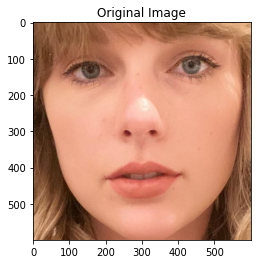

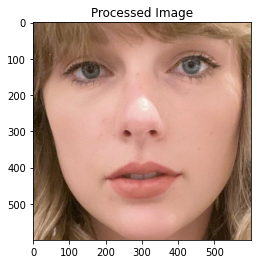

In [538]:
# input images
image_path = '../example_images/taylor-swift.jpg'  # input image filename
img = cv2.imread(image_path)
# Process image, show on notebook, write to disk and crop the face section
wb_img, path = white_balancing(img, imshow=1, imwrite=1, imcrop=1)

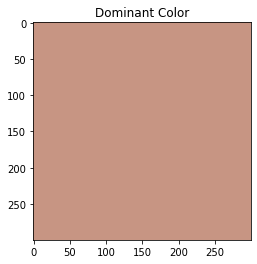

(199, 149, 131)

In [152]:
dominant_color(path, show=1)

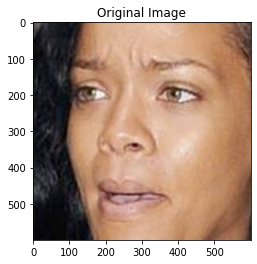

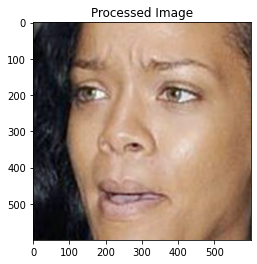

In [158]:
# input images
image_path = '../example_images/rihanna.jpg'  # input image filename
img = cv2.imread(image_path)
# Process image, show on notebook, write to disk and crop the face section
wb_img, path = white_balancing(img, imshow=1, imwrite=1, imcrop=1)

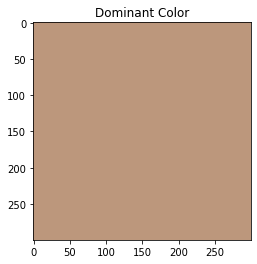

(188, 151, 124)

In [159]:
dominant_color(path, show=1)

In [540]:
def hex_to_rgb(value):
    lv = len(value)
    return [int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3)]

In [541]:
data = '../data/shades.json'
df = pd.read_json(data)
df['Label'] = df['brand'] + ' ' + df['product'] + ' ' + df['shade']
df.describe(include='all')

,brand,brand_short,product,product_short,hex,H,S,V,L,group,shade,Label
count,589,589,589,589,589,589,589,589,589.000000,589.000000,589,589
unique,33,33,34,33,583,36,75,75,NaN,NaN,502,584
top,MAC,ma,Studio Fix,dw,e2ac7c,28,0.45,0.84,NaN,NaN,Mocha,MAC Studio Fix NC30
freq,42,42,42,42,2,53,18,28,NaN,NaN,4,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.809847,3.320883,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.663267,1.922987,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,4.000000,NaN,NaN


In [547]:
df['R'] = df['hex'].apply(lambda x: hex_to_rgb(x)[0])
df['G'] = df['hex'].apply(lambda x: hex_to_rgb(x)[1])
df['B'] = df['hex'].apply(lambda x: hex_to_rgb(x)[2])
df_X = df[['R', 'G', 'B', 'Label']]

In [548]:
df_X

,R,G,B,Label
0,243,207,179,Maybelline Fit Me Fair Porcelain
1,255,227,194,Maybelline Fit Me Fair Ivory
2,255,224,205,Maybelline Fit Me Porcelain
3,255,211,190,Maybelline Fit Me Natural Ivory
4,189,149,132,Maybelline Fit Me Ivory
...,...,...,...,...
584,238,207,186,L'Oréal True Match N4 Nude Beige
585,232,199,184,L'Oréal True Match G5 Gold Cream
586,240,203,185,L'Oréal True Match W6 Sun Beige
587,233,196,177,L'Oréal True Match N7 Nude Amber


In [549]:
df_Y = df_X.pop('Label')

In [556]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
X = df_X.to_numpy()
y = df_Y.to_numpy()
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [561]:
list(dominant_color(path))

[199, 149, 131]

In [565]:
neigh.predict([list(dominant_color(path))])

array(['Make Up For Ever Ultra HD Y415'], dtype=object)

In [580]:
# load the model from disk
r = neigh.predict([list(dominant_color(path))])
r[0]

'Make Up For Ever Ultra HD Y415'